In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Funktionen

In [2]:
# Funktionen
f1 = lambda t: np.cos(100*t)
f2 = lambda t: 5*t**2 -3*t + 5
f3 = lambda t: np.exp(-5*t)
# Ableitungen
df1 = lambda t: -100*np.sin(100*t)
df2 = lambda t: 10*t - 3
df3 = lambda t: -5*np.exp(-5*t)

### Differenzialoperatoren

In [3]:
def ForwardEuler(idx,T,f):
    """
    i: Indexmenge, z.B. [ 0 1 5 7 12 ]
    T: Vektor der diskreten Zeitpunkte T
    f: Zeiger auf die Funktion, die verwendet werden soll
    """
    if not type(idx) == np.ndarray:
        idx = np.array([[idx]])
    Ni = idx.shape[0]
    N  = T.shape[0]
    df = np.zeros(Ni)
    for this_i in range(Ni):
        i = idx[this_i]
        if (i>= 0 and i < N-1):  # Zulässige Punkte
            h = T[i+1] - T[i]
            df[i] = (f(T[i+1]) - f(T[i]))/h
        elif i == N-1:  # Sonderfall, in dem ForwardEuler versagt
            df[i] = BackwardEuler(i,T,f)[i]
        else:
            df[i] = np.inf # Error!

    return df

In [4]:
def BackwardEuler(idx,T,f):
    """
    i: Indexmenge, z.B. [ 0 1 5 7 12 ]
    T: Vektor der diskreten Zeitpunkte T
    f: Zeiger auf die Funktion, die verwendet werden soll
    """
    if not type(idx) == np.ndarray:
        idx = np.array([[idx]])
    Ni = idx.shape[0]
    N  = T.shape[0]
    df = np.zeros(N)
    for this_i in range(Ni):
        i = idx[this_i]
        if (i > 0 and i <= N-1):  # Zulässige Punkte
            h = T[i] - T[i-1]
            df[i] = (f(T[i]) - f(T[i-1]))/h
        elif i == 0:  # Sonderfall, in dem BackwardEuler versagt
            df[i] = ForwardEuler(i,T,f)[0]
        else:
            df[i] = np.inf # Error!
        
    return df

In [5]:
def MidpointRule(idx,T,f):
    """
    i: Indexmenge, z.B. [ 0 1 5 7 12 ]
    T: Vektor der diskreten Zeitpunkte T
    f: Zeiger auf die Funktion, die verwendet werden soll
    """
    if not type(idx) == np.ndarray:
        idx = np.array([[i]])
    Ni = idx.shape[0]
    N  = T.shape[0]
    df = np.zeros(Ni)
    for this_i in range(Ni):
        i = idx[this_i]
        if (i > 0 and i < N-1):  # Zulässige Punkte
            h1 = T[i+1] - T[i]
            h2 = T[i] - T[i-1]
            df[i] = (f(T[i+1]) - f(T[i-1]))/(h1 + h2)
        elif i == 0:  # Sonderfall, in dem BackwardEuler versagt
            df[i] = ForwardEuler(i,T,f)[0]
        elif i == N-1: # Sonderfall, in dem ForwardEuler versagt
            df[i] = BackwardEuler(i,T,f)[i]
        else:
            df[i] = np.inf # Error!
    return df

### Darstellung Approximationen vs. Exakte Ableitungen

In [6]:
plt.close("all")
%matplotlib inline

#### f1

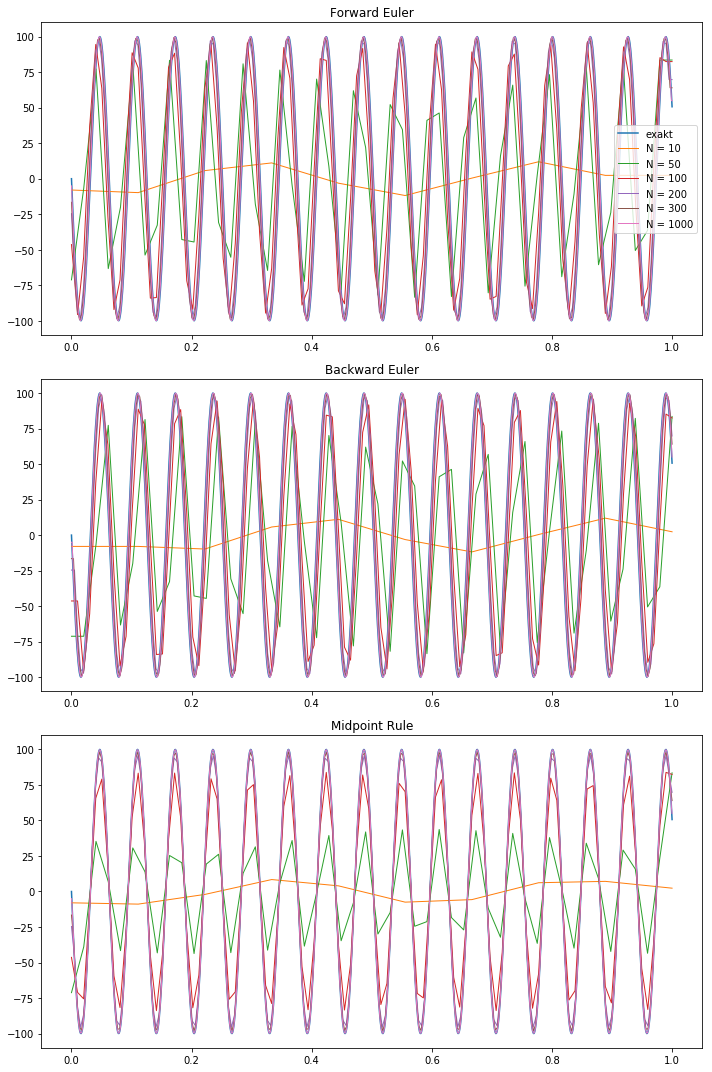

In [7]:
N_list = [10,50,100,200,300,1000]
#N_list = [10,50]

my_func = f1
my_dfunc = df1

fig1, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10, 15))

# Exakt plotten
T = np.linspace(0,1,1000)
df_exakt = my_dfunc(T)  
ax1.plot(T,df_exakt,label='exakt')
ax2.plot(T,df_exakt,label='exakt')
ax3.plot(T,df_exakt,label='exakt')

#Approx plotten für verschiedene Auflösungen
for N in N_list:
    idxes = np.arange(N)
    T = np.linspace(0,1,N)
    
    df_approx = ForwardEuler(idxes,T,my_func)
    ax1.set_title("Forward Euler")
    l1, = ax1.plot(T,df_approx,label='N = {}'.format(N),linewidth='1')
    
    df_approx = BackwardEuler(idxes,T,my_func)
    ax2.set_title("Backward Euler")
    l2, = ax2.plot(T,df_approx,label='N = {}'.format(N),linewidth='1')
    
    df_approx = MidpointRule(idxes,T,my_func)
    ax3.set_title("Midpoint Rule")
    l3, = ax3.plot(T,df_approx,label='N = {}'.format(N),linewidth='1')

ax1.legend()
plt.tight_layout()
plt.show()

#### f2

In [11]:
print (np.__version__)

1.13.3


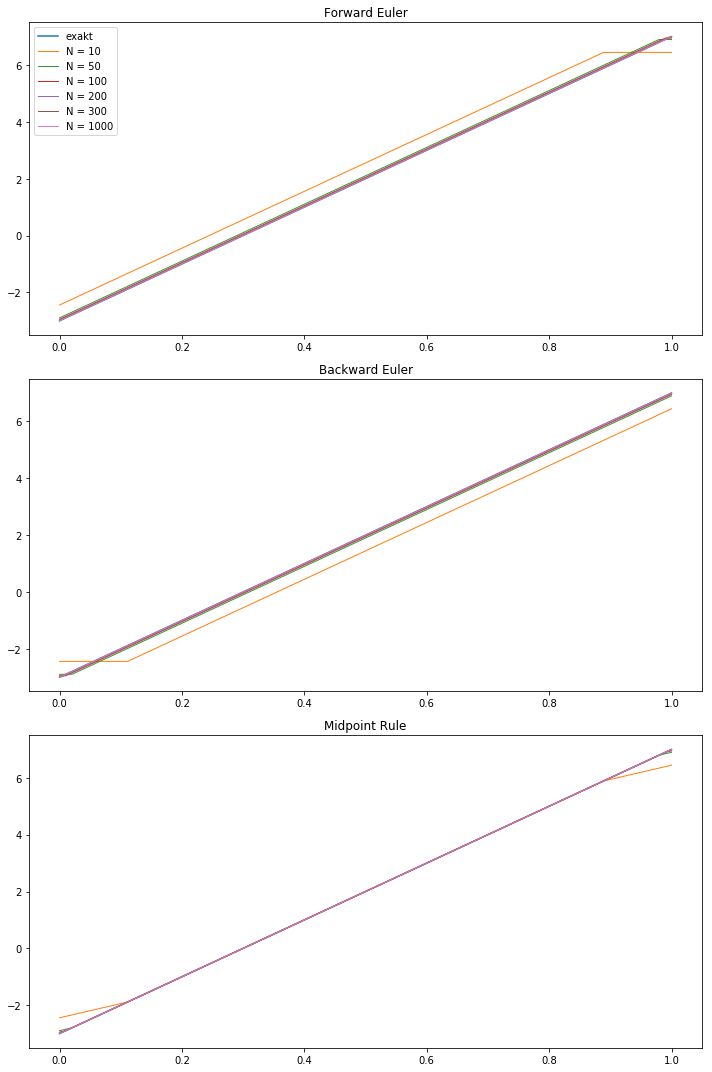

In [8]:
N_list = [10,50,100,200,300,1000]
#N_list = [10,50]

my_func = f2
my_dfunc = df2

fig2, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10, 15))

# Exakt plotten
T = np.linspace(0,1,1000)
df_exakt = my_dfunc(T)  
ax1.plot(T,df_exakt,label='exakt')
ax2.plot(T,df_exakt,label='exakt')
ax3.plot(T,df_exakt,label='exakt')

#Approx plotten für verschiedene Auflösungen
for N in N_list:
    idxes = np.arange(N)
    T = np.linspace(0,1,N)
    
    df_approx = ForwardEuler(idxes,T,my_func)
    ax1.set_title("Forward Euler")
    l1, = ax1.plot(T,df_approx,label='N = {}'.format(N),linewidth='1')
    
    df_approx = BackwardEuler(idxes,T,my_func)
    ax2.set_title("Backward Euler")
    l2, = ax2.plot(T,df_approx,label='N = {}'.format(N),linewidth='1')
    
    df_approx = MidpointRule(idxes,T,my_func)
    ax3.set_title("Midpoint Rule")
    l3, = ax3.plot(T,df_approx,label='N = {}'.format(N),linewidth='1')

ax1.legend()
plt.tight_layout()
plt.show()

#### f3

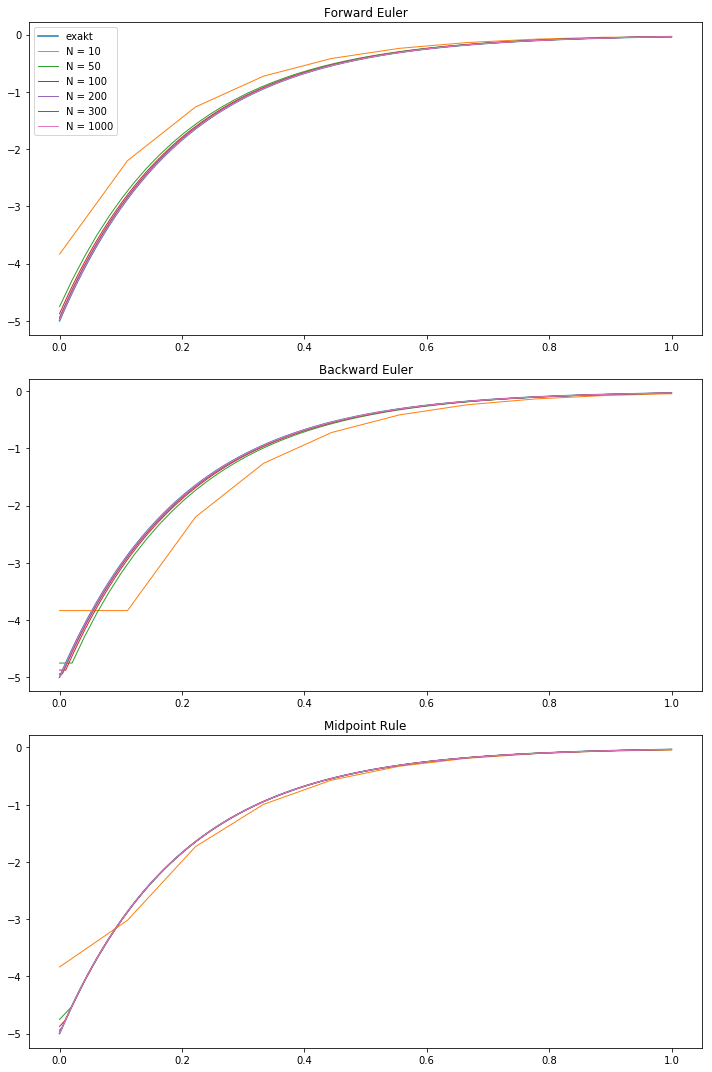

In [9]:
N_list = [10,50,100,200,300,1000]
#N_list = [10,50]

my_func = f3
my_dfunc = df3

fig1, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10, 15))

# Exakt plotten
T = np.linspace(0,1,1000)
df_exakt = my_dfunc(T)  
ax1.plot(T,df_exakt,label='exakt')
ax2.plot(T,df_exakt,label='exakt')
ax3.plot(T,df_exakt,label='exakt')

#Approx plotten für verschiedene Auflösungen
for N in N_list:
    idxes = np.arange(N)
    T = np.linspace(0,1,N)
    
    df_approx = ForwardEuler(idxes,T,my_func)
    ax1.set_title("Forward Euler")
    l1, = ax1.plot(T,df_approx,label='N = {}'.format(N),linewidth='1')
    
    df_approx = BackwardEuler(idxes,T,my_func)
    ax2.set_title("Backward Euler")
    l2, = ax2.plot(T,df_approx,label='N = {}'.format(N),linewidth='1')
    
    df_approx = MidpointRule(idxes,T,my_func)
    ax3.set_title("Midpoint Rule")
    l3, = ax3.plot(T,df_approx,label='N = {}'.format(N),linewidth='1')

ax1.legend()
plt.tight_layout()
plt.show()